# Bootstrapping a Ibor Curve

Constructing a Ibor curve from a combination of deposits and swaps

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils import *
from financepy.products.funding import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  24 Oct 2020 at 20:12 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [5]:
valuationDate = FinDate(2019, 8, 9)
spotDays = 2
settlementDate = valuationDate.addDays(spotDays)

## Ibor Deposits

In [6]:
dcType = FinDayCountTypes.ACT_360

In [7]:
depo1 = FinIborDeposit(settlementDate, "1M", 0.022009, dcType)
depo2 = FinIborDeposit(settlementDate, "2M", 0.022138, dcType)
depo3 = FinIborDeposit(settlementDate, "3M", 0.021810, dcType)
depo4 = FinIborDeposit(settlementDate, "6M", 0.020503, dcType)
depo5 = FinIborDeposit(settlementDate, "12M", 0.019930, dcType)

In [8]:
depos = [depo1,depo2,depo3,depo4,depo5]

In [9]:
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL

## Interest Rate Swaps

In [10]:
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swapType = FinSwapTypes.PAY

In [11]:
swap1 = FinIborSwap(settlementDate,"2Y",swapType,0.015910,fixedFreq,dcType)
swap2 = FinIborSwap(settlementDate,"3Y",swapType,0.014990,fixedFreq,dcType)
swap3 = FinIborSwap(settlementDate,"4Y",swapType,0.014725,fixedFreq,dcType)
swap4 = FinIborSwap(settlementDate,"5Y",swapType,0.014640,fixedFreq,dcType)
swap5 = FinIborSwap(settlementDate,"6Y",swapType,0.014800,fixedFreq,dcType)
swap6 = FinIborSwap(settlementDate,"7Y",swapType,0.014995,fixedFreq,dcType)
swap7 = FinIborSwap(settlementDate,"8Y",swapType,0.015180,fixedFreq,dcType)
swap8 = FinIborSwap(settlementDate,"9Y",swapType,0.015610,fixedFreq,dcType)
swap9 = FinIborSwap(settlementDate,"10Y",swapType,0.0159880,fixedFreq,dcType)
swap10 = FinIborSwap(settlementDate,"12Y",swapType,0.016430,fixedFreq,dcType)

In [12]:
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

In [13]:
fras = []

# Bootstrapping The Curve

In [14]:
liborCurve = FinIborSingleCurve(valuationDate, depos, fras, swaps)

Inserting synthetic deposit


Can we show that the Ibor deposits have been repriced at par

In [15]:
for depo in depos:
    v = depo.value(settlementDate, liborCurve)
    print(depo._notional, depo._maturityDate, v)

100.0 SUN 11 AUG 2019 100.0
100.0 WED 11 SEP 2019 100.0
100.0 FRI 11 OCT 2019 100.0
100.0 MON 11 NOV 2019 99.99999999999999
100.0 TUE 11 FEB 2020 99.99999999999999
100.0 TUE 11 AUG 2020 100.0


In [16]:
for swap in swaps:
    v = swap.value(settlementDate, liborCurve, liborCurve, None)
    print(swap._notional, swap._maturityDate, v)

1000000 WED 11 AUG 2021 -2.510205376893282e-10
1000000 THU 11 AUG 2022 -3.41970007866621e-10
1000000 FRI 11 AUG 2023 -4.5838532969355583e-10
1000000 MON 12 AUG 2024 -2.3283064365386963e-10
1000000 MON 11 AUG 2025 -3.2014213502407074e-10
1000000 TUE 11 AUG 2026 -5.529727786779404e-10
1000000 WED 11 AUG 2027 -5.384208634495735e-10
1000000 FRI 11 AUG 2028 -6.402842700481415e-10
1000000 MON 13 AUG 2029 -7.8580342233181e-10
1000000 MON 11 AUG 2031 -9.89530235528946e-10


Looks good!

## The Forward Curve

In [20]:
years = np.linspace(0, 15.0, 200)
dates = settlementDate.addYears(years)
fwds = liborCurve.fwd(dates)

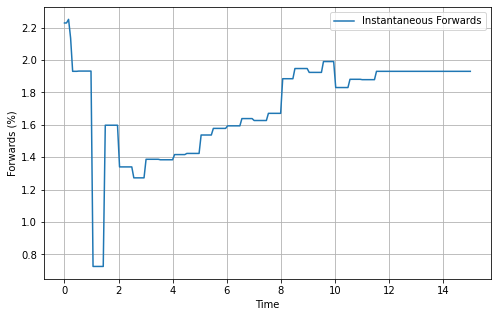

In [21]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

Zoom in one the short end

In [22]:
years = np.linspace(0,1.0,1000)
dates = settlementDate.addYears(years)
fwds = liborCurve.fwd(dates)

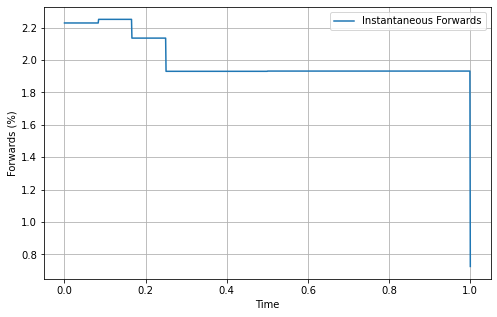

In [23]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

## Extracting the Zero Rate Curves

We choose a range of zero rate frequencies.

In [24]:
years = np.linspace(1/365,5,100)
dates = settlementDate.addYears(years)
zerosC = liborCurve.zeroRate(dates, FinFrequencyTypes.CONTINUOUS)
zeros1 = liborCurve.zeroRate(dates, FinFrequencyTypes.ANNUAL)
zeros2 = liborCurve.zeroRate(dates, FinFrequencyTypes.SEMI_ANNUAL)
zeros4 = liborCurve.zeroRate(dates, FinFrequencyTypes.QUARTERLY)

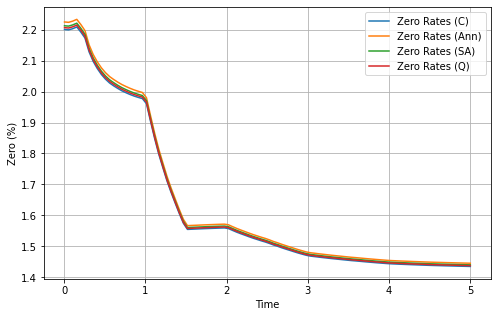

In [25]:
plt.figure(figsize=(8,5))
plt.plot(years,zerosC*100, label="Zero Rates (C)")
plt.plot(years,zeros1*100, label="Zero Rates (Ann)")
plt.plot(years,zeros2*100, label="Zero Rates (SA)")
plt.plot(years,zeros4*100, label="Zero Rates (Q)")
plt.xlabel("Time")
plt.ylabel("Zero (%)")
plt.legend()
plt.grid()

Copyright (c) 2020 Dominic O'Kane